Анимация в matplotlib Python

Базовый класс Matplotlib под названием animation занимается вопросом анимации. Он предоставляет структуру, вокруг которой строится функционал создаваемой анимации. Для этих целей существуют два основных интерфейса, которые используют:

FuncAnimation — создает анимацию путем повторяющегося вызова функции func.
ArtistAnimation — анимация, использующая фиксированный набор объектов Artist.

Впрочем, из этих двоих, предпочтение чаще отдают FuncAnimation благодаря удобному использованию. Вы можете узнать о них больше в документации, так как дальше мы будем работать именно с FuncAnimation.

MovieWriter imagemagick unavailable; using Pillow instead.


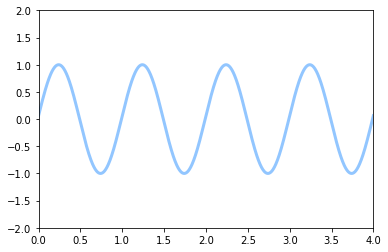

In [1]:
# Используем FuncAnimation для создания простой анимации синусоиды, движущейся по экрану.

# Подгрузим библиотеки
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

# Зададим стиль графика
plt.style.use('seaborn-pastel')
 
 
fig = plt.figure()

# Создаем фигуру с одной осью
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))

# Создаем пустой пакет строки
line, = ax.plot([], [], lw=3)
 
# Функция init отвечает за запуск процессов
def init():
    line.set_data([], [])
    return line,
# Фунция анимации
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# Создаем анимацию
anim = FuncAnimation(fig, animate,
                     init_func=init,
                     frames=200, 
                     interval=20, blit=True)
 
 
anim.save('sine_wave.gif', writer='imagemagick')


MovieWriter imagemagick unavailable; using Pillow instead.


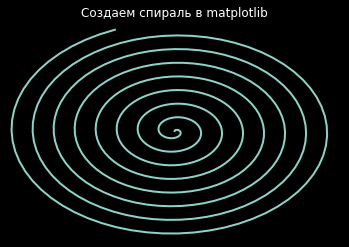

In [2]:
# Создадим анимацию спирали 
#
# Подгрузим необходимые библиотеки
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Выберем стиль отображения
plt.style.use('dark_background')

# Зададим параметры графика
fig = plt.figure()
ax = plt.axes(xlim=(-50, 50), ylim=(-50, 50))
line, = ax.plot([], [], lw=2)
 
 
# Функция инициализации.
def init():
    # создение пустого графа.
    line.set_data([], [])
    return line,
 
# Создаем технические массивы 
xdata, ydata = [], []
 
 
# функция анимации
def animate(i):
    t = 0.1 * i
 
    # x, y данные на графике
    x = t * np.sin(t)
    y = t * np.cos(t)
 
    # добавление новых точек в список точек осей x, y
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
    return line,
 
 
# Заголовок анимации
plt.title('Создаем спираль в matplotlib')
# Скрываем лишние данные
plt.axis('off')
 
# Вызов анимации.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=20, blit=True)
 
# Сохраняем анимацию как gif файл
anim.save('coil.gif', writer='imagemagick')

Обновляемые графики в matplotlib.

Обновляемые графики могут понадобиться, для лучшего восприятия  динамических величин, таких как данные о стоках, данные датчиков, и другие нестационарные данные. Построим простой график, который автоматически будет обновляться с появлением новых данных в системе.

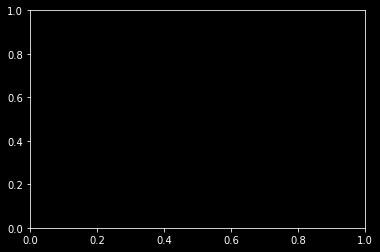

In [3]:
# Подгрузим библиотеки
import matplotlib.pyplot as plt
import matplotlib.animation as animation
 
plt.style.use('dark_background')
 
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
 
 
def animate(i):

    data = open('stock.txt', 'r').read()
    lines = data.split('\n')
    xs = []
    ys = []
 
    for line in lines:
        x, y = line.split(',')  # Отделяем дату от цены
        xs.append(x)
        ys.append(float(y))
 
    ax1.clear()
    ax1.plot(xs, ys)
 
    plt.xlabel('Дата')
    plt.ylabel('Цена')
    plt.title('Обновляемые графики в matplotlib')

  
 
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()


Помимо обычных графиков анимацию можно производить и с 3D.
Суть в изменении угла обзора камеры и использовать каждое итоговое изображение для создания анимации. 
Есть хороший раздел, посвященный данному вопросу в Python - Graph Gallery.

Создайте папку под названием frames в том же каталоге, где расположен notebook. Все изображения будут храниться в этой папке, а затем будут использованы в анимации.

c:\users\evgen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


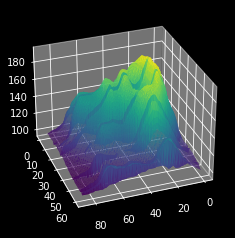

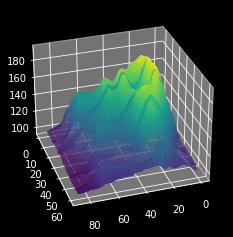

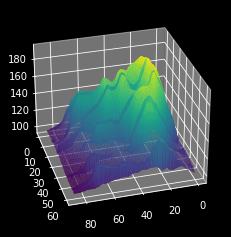

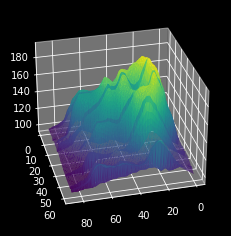

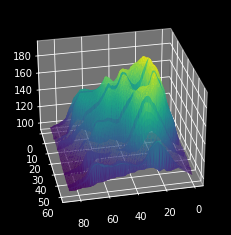

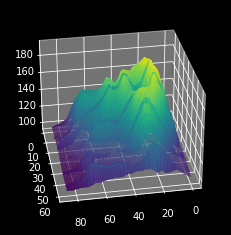

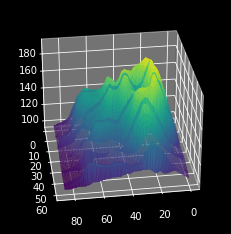

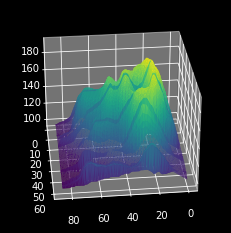

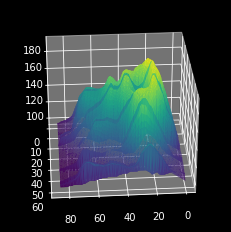

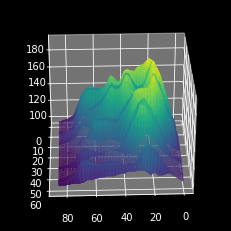

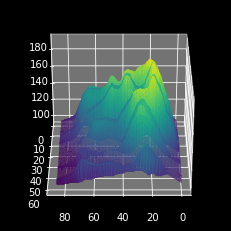

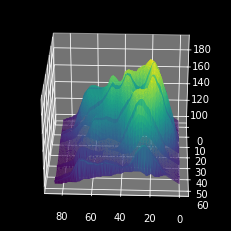

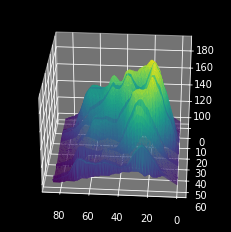

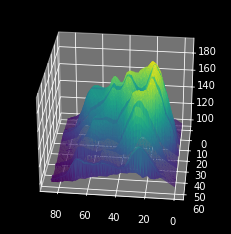

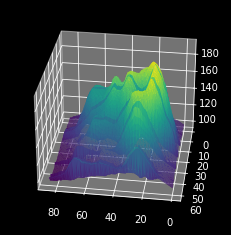

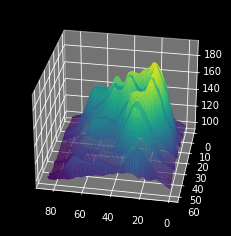

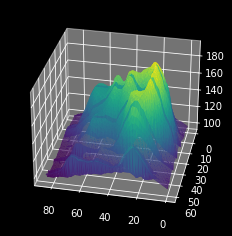

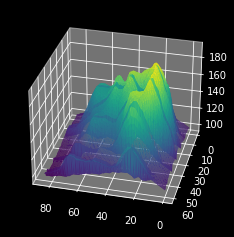

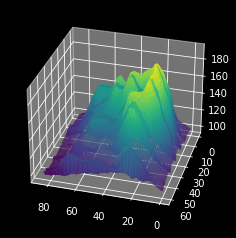

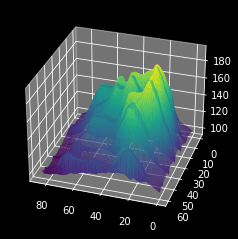

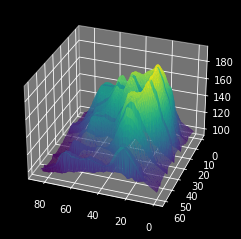

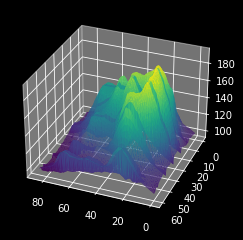

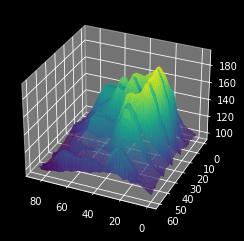

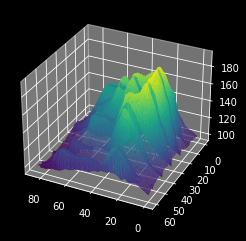

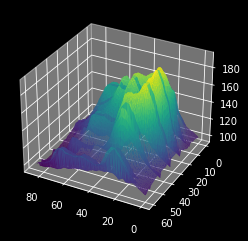

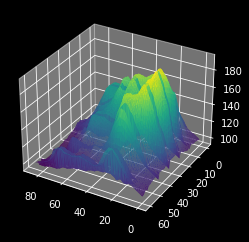

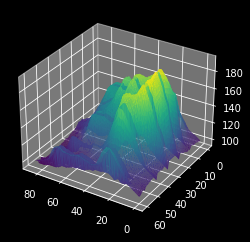

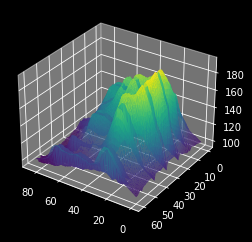

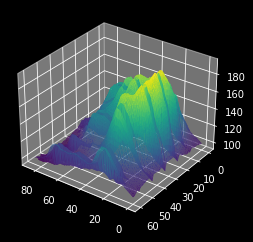

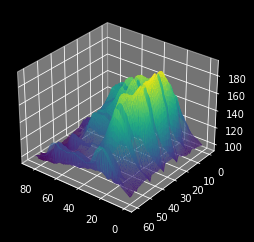

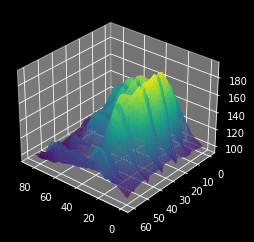

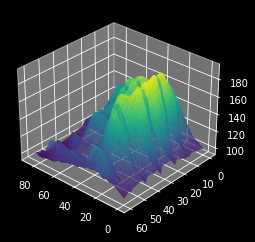

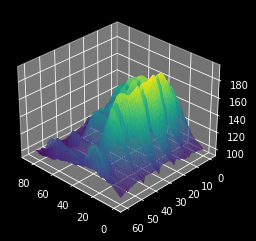

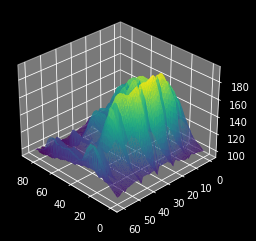

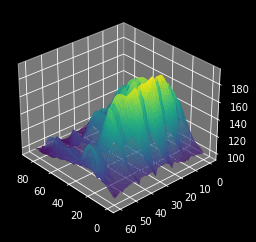

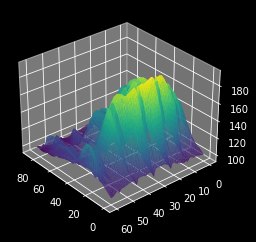

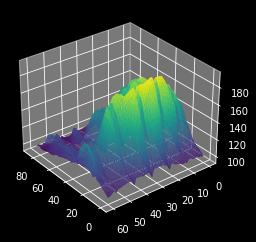

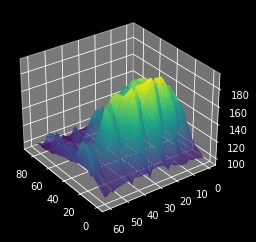

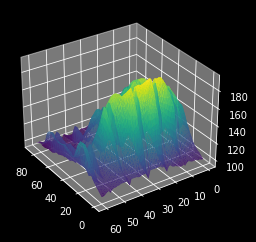

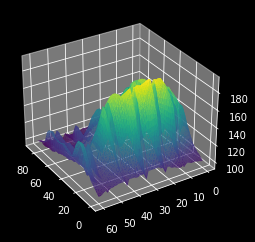

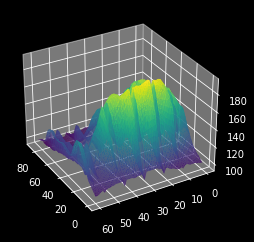

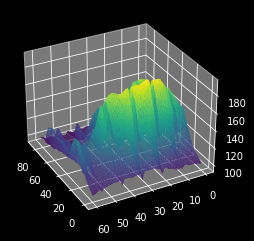

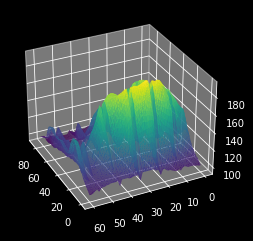

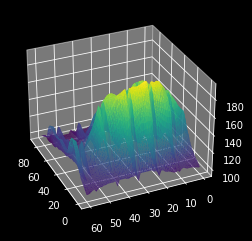

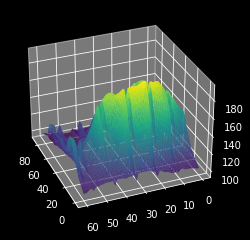

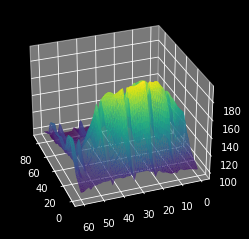

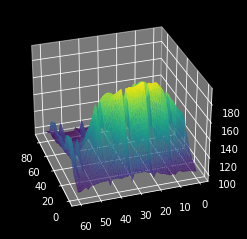

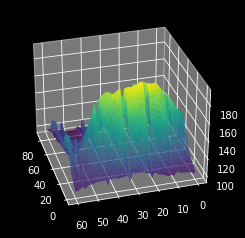

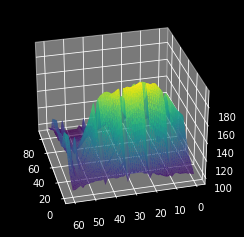

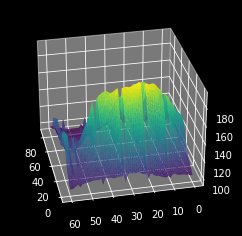

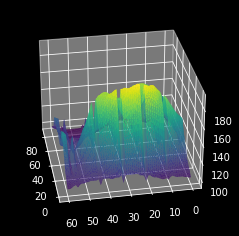

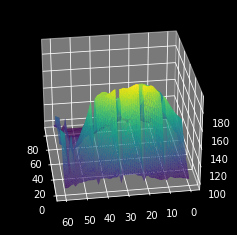

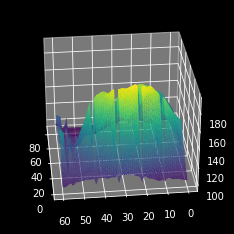

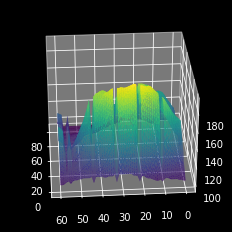

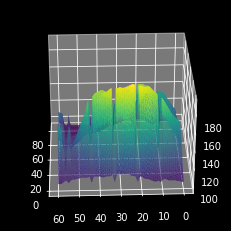

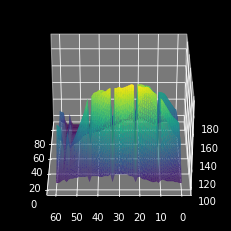

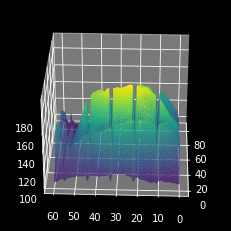

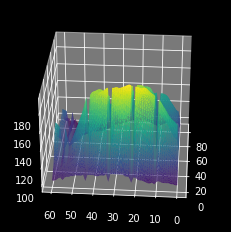

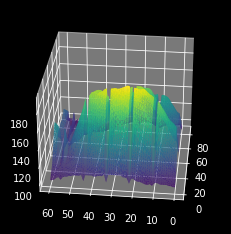

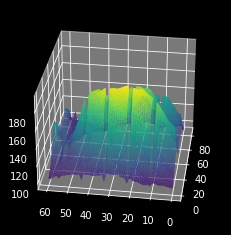

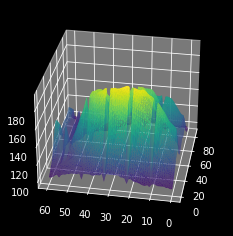

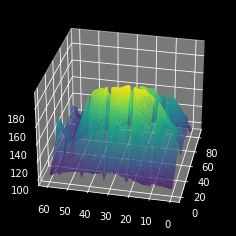

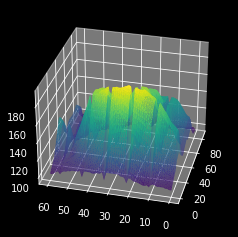

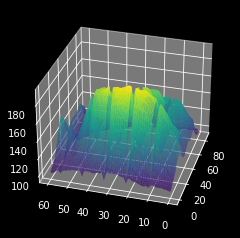

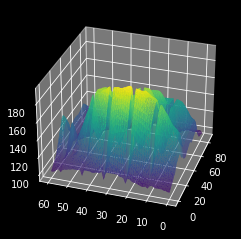

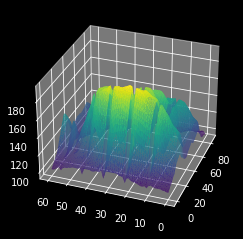

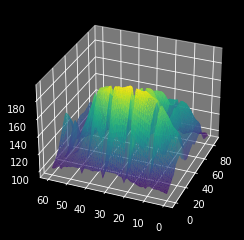

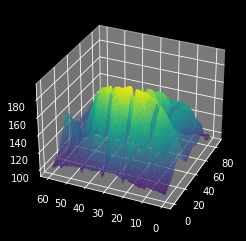

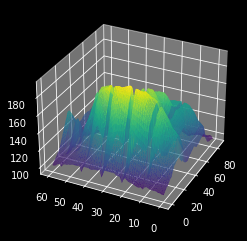

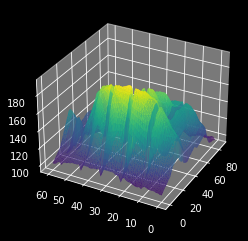

In [4]:
# Подгрузим необходимые библиотеки
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
 
# Открываем файл для построения графика.
data = pd.read_csv('3d-data.csv')
 
# Преобразуем его в длинный формат
df = data.unstack().reset_index()
df.columns=["X", "Y", "Z"]
 
# Переименовываем старые названия столбцов в числовой формат.
df['X'] = pd.Categorical(df['X'])
df['X'] = df['X'].cat.codes
 
# Мы собираемся сделать 20 графиков, для 20 разных углов
for angle in range(70, 210, 2):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
 
    ax.view_init(30, angle)
 
    filename = 'frames/step'+str(angle)+'.png'
    plt.savefig(filename, dpi=96)
    plt.gca()

Анимация и модуль Celluloid.

Celluloid — это модуль Python, который упрощает процесс создания анимаций в matplotlib. 
Эта библиотека создает фигуру matplotlib и создает из нее камеру. 
Далее она снова использует фигуру, и по мере создания каждого кадра, делает скриншот нашей камерой.
Наконец, анимация создается со всеми сохраненными кадрами.

MovieWriter imagemagick unavailable; using Pillow instead.


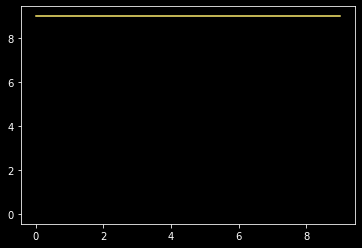

In [5]:
# Подключим библиотеки
from matplotlib import pyplot as plt
from celluloid import Camera
 
fig = plt.figure()
camera = Camera(fig)
 

for i in range(10):
    plt.plot([i] * 10)
    camera.snap()
 
animation = camera.animate()
animation.save('celluloid_minimal.gif', writer = 'imagemagick')

MovieWriter imagemagick unavailable; using Pillow instead.


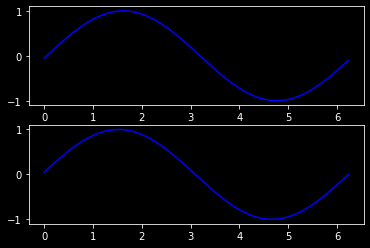

In [6]:
# Создадим подграфики
# 
# Подгрузим библиотеки
import numpy as np
from matplotlib import pyplot as plt
from celluloid import Camera
 
    
fig, axes = plt.subplots(2)
camera = Camera(fig)
 
# Создадим массив    
t = np.linspace(0, 2 * np.pi, 128, endpoint=False)


for i in t:
    axes[0].plot(t, np.sin(t + i), color='blue')
    axes[1].plot(t, np.sin(t - i), color='blue')
    camera.snap()
    
animation = camera.animate()  
animation.save('celluloid_subplots.gif', writer = 'imagemagick')

MovieWriter imagemagick unavailable; using Pillow instead.


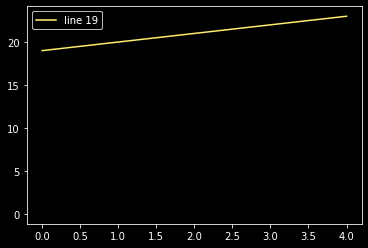

In [7]:
# Отобразим легенды
# 
# Подгрузим библиотеки
import matplotlib
from matplotlib import pyplot as plt
from celluloid import Camera
 
fig = plt.figure()
 
    
camera = Camera(fig)


for i in range(20):
    t = plt.plot(range(i, i + 5))
    plt.legend(t, [f'line {i}'])
    camera.snap()
 
animation = camera.animate()
animation.save('celluloid_legends.gif', writer = 'imagemagick')